In [1]:
import launchpad_py as launchpad
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

import random, time, sys, imageio

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
lp = launchpad.Launchpad();

lp = launchpad.LaunchpadMk2()
if lp.Open(0, 'mk2'):
    print('Launchpad Mk2')

Launchpad Mk2


In [3]:
for y in range(9):
    for x in range(9):
        color = [
            random.randint(0, 255),
            random.randint(0, 255),
            random.randint(0, 255)
        ]

        lp.LedCtrlXYByRGB(x, y, color)
        time.sleep(0.05)

In [4]:
lp.Reset() # turn all LEDs off
# lp.Close()

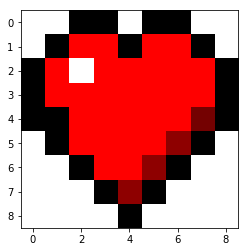

In [5]:
img = cv2.imread('img/heart.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [6]:
def rgb_to_colorcode(rgb):
    colors_rgb = [
        # 0..63
        (0, 0, 0), (80, 80, 80), (160, 160, 160), (240, 240, 240), (255, 145, 133), (255, 35, 10), (230, 31, 9), (204, 28, 8), 
        (255, 194, 133), (255, 133, 10), (230, 119, 9), (204, 106, 8), (255, 243, 133), (255, 231, 10), (230, 207, 9), (204, 184, 8), 
        (218, 255, 133), (182, 255, 10), (163, 230, 9), (145, 204, 8), (169, 255, 133), (84, 255, 10), (75, 230, 9), (67, 204, 8), 
        (133, 255, 145), (10, 255, 35), (9, 230, 31), (8, 204, 28), (133, 255, 194), (10, 255, 133), (9, 230, 119), (8, 204, 106), 
        (133, 255, 243), (10, 255, 231), (9, 230, 207), (8, 204, 184), (133, 218, 255), (10, 182, 255), (9, 163, 230), (8, 145, 204), 
        (133, 169, 255), (10, 84, 255), (9, 75, 230), (8, 67, 204), (145, 133, 255), (35, 10, 255), (31, 9, 230), (28, 8, 204), 
        (194, 133, 255), (133, 10, 255), (119, 9, 230), (106, 8, 204), (243, 133, 255), (231, 10, 255), (207, 9, 230), (184, 8, 204), 
        (255, 133, 218), (255, 10, 182), (230, 9, 163), (204, 8, 145), (240, 65, 21), (191, 97, 0), (177, 140, 0), (133, 151, 8), 
        # 64..127
        (80, 160, 39), (0, 157, 142), (0, 121, 192), (0, 0, 255), (45, 80, 164), (98, 71, 176), (123, 123, 123), (60, 60, 60), 
        (255, 0, 0), (191, 187, 100), (166, 192, 0), (120, 200, 35), (52, 197, 0), (0, 192, 175), (0, 162, 241), (82, 125, 231), 
        (136, 104, 231), (164, 71, 175), (185, 59, 105), (151, 87, 49), (248, 108, 0), (190, 253, 0), (130, 255, 93), (0, 255, 0), 
        (0, 255, 165), (82, 255, 232), (0, 233, 255), (137, 196, 255), (145, 165, 255), (185, 137, 255), (218, 103, 231), (255, 44, 214), 
        (255, 166, 1), (255, 242, 0), (227, 246, 0), (220, 197, 0), (191, 158, 95), (136, 181, 123), (134, 194, 186), (154, 179, 197), 
        (132, 165, 195), (199, 139, 122), (244, 60, 127), (255, 147, 165), (255, 163, 111), (255, 239, 154), (210, 229, 148), (186, 209, 111), 
        (169, 169, 169), (211, 254, 224), (204, 241, 249), (185, 192, 228), (205, 186, 229), (208, 208, 208), (223, 230, 229), (255, 255, 255), 
        (242, 33, 10), (191, 26, 8), (172, 242, 10), (136, 191, 8), (242, 219, 10), (191, 173, 8), (247, 164, 9), (224, 107, 65)
    ]
    return pairwise_distances_argmin(rgb.reshape((-1, 3)), colors_rgb).reshape(rgb.shape[:2])

In [7]:
lp.Reset() # turn all LEDs off

img_colorcodes = rgb_to_colorcode(img)

for y in range(9):
    for x in range(9):
        code = img_colorcodes[y, x]
        lp.LedCtrlXYByCode(x, y, code)

        time.sleep(0.05)

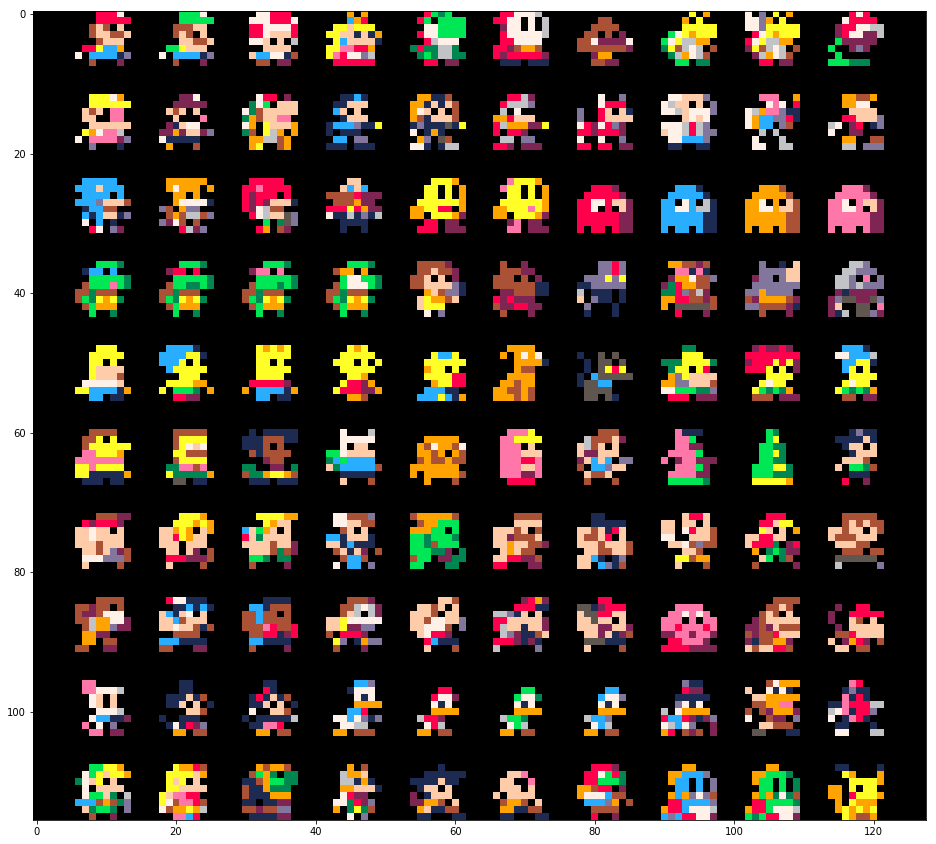

In [8]:
# image created by Johan Vinet
# http://johanvinet.tumblr.com/post/127476776680
img = cv2.imread('img/8x8.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 16))
plt.imshow(img)

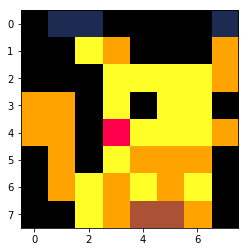

In [9]:
img_patch = img[-8:, 114:122]

plt.imshow(img_patch)

In [10]:
lp.Reset()

img_colorcodes = rgb_to_colorcode(img_patch)

for y in range(0, 8):
    for x in range(0, 8):
        code = img_colorcodes[y, x]
        lp.LedCtrlXYByCode(x, y+1, code)

        time.sleep(0.001)

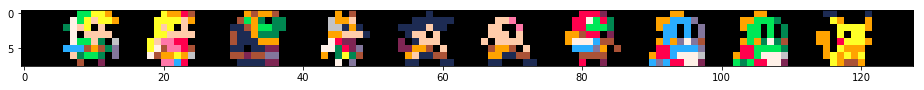

In [11]:
img_part = img[-8:]

plt.figure(figsize=(16, 16))
plt.imshow(img_part)

In [12]:
lp.Reset()

h, w, _ = img_part.shape

for i in range(w):
    img_patch = img_part[:, i:i+8]
    
    img_colorcodes = rgb_to_colorcode(img_patch)
    
    if img_patch.shape[1] < 8:
        lp.Reset()
        break

    for y in range(0, 8):
        for x in range(0, 8):
            code = img_colorcodes[y, x]

            lp.LedCtrlXYByCode(x, y+1, code)

            time.sleep(0.001)
            
    time.sleep(0.1)

Total 39 frames in the gif!
Width: 56, height: 16


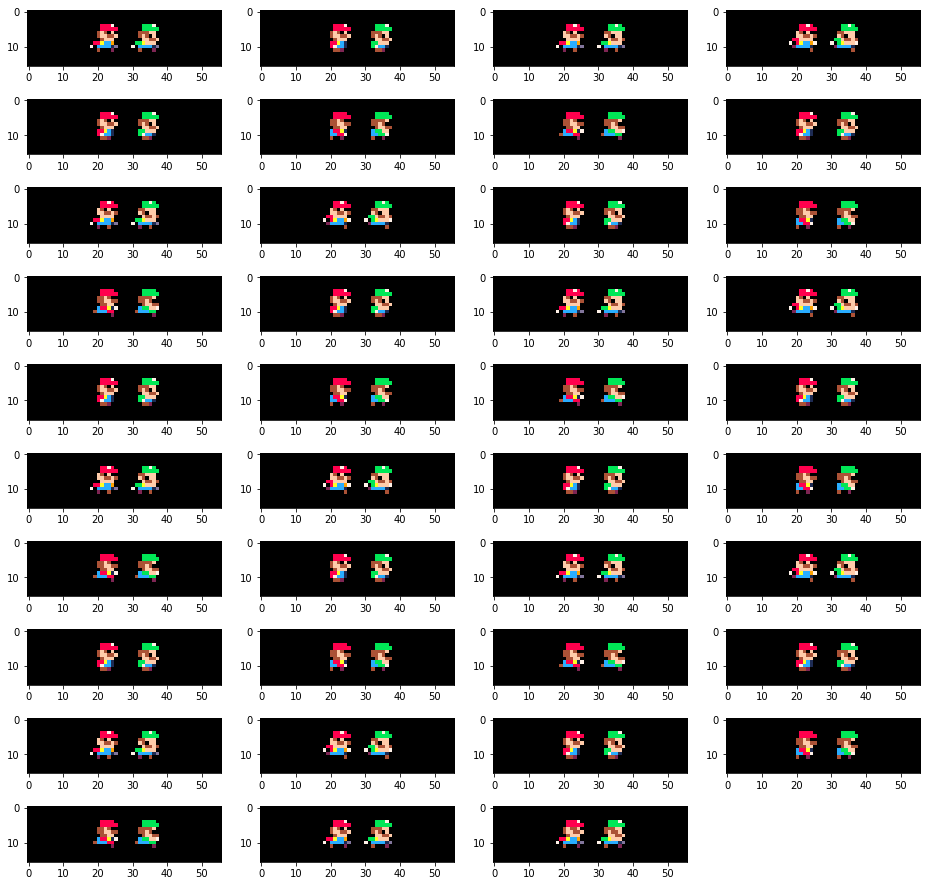

In [13]:
gif = imageio.mimread('img/mario_bros.gif')
n_frames = len(gif)
print('Total %d frames in the gif!' % n_frames)

h, w = int(len(gif[0]) / 10), int(len(gif[0][0]) / 10)
print('Width: %d, height: %d' % (w, h))

imgs = np.empty((n_frames, h, w, 3), dtype=np.uint8)

plt.figure(figsize=(16, 16))

for i, img in enumerate(gif):
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    img = cv2.resize(img, dsize=(w, h), interpolation=cv2.INTER_NEAREST)
    
    imgs[i] = img
    
    plt.subplot(n_frames // 4 + 1, 4, i+1)
    plt.imshow(img)

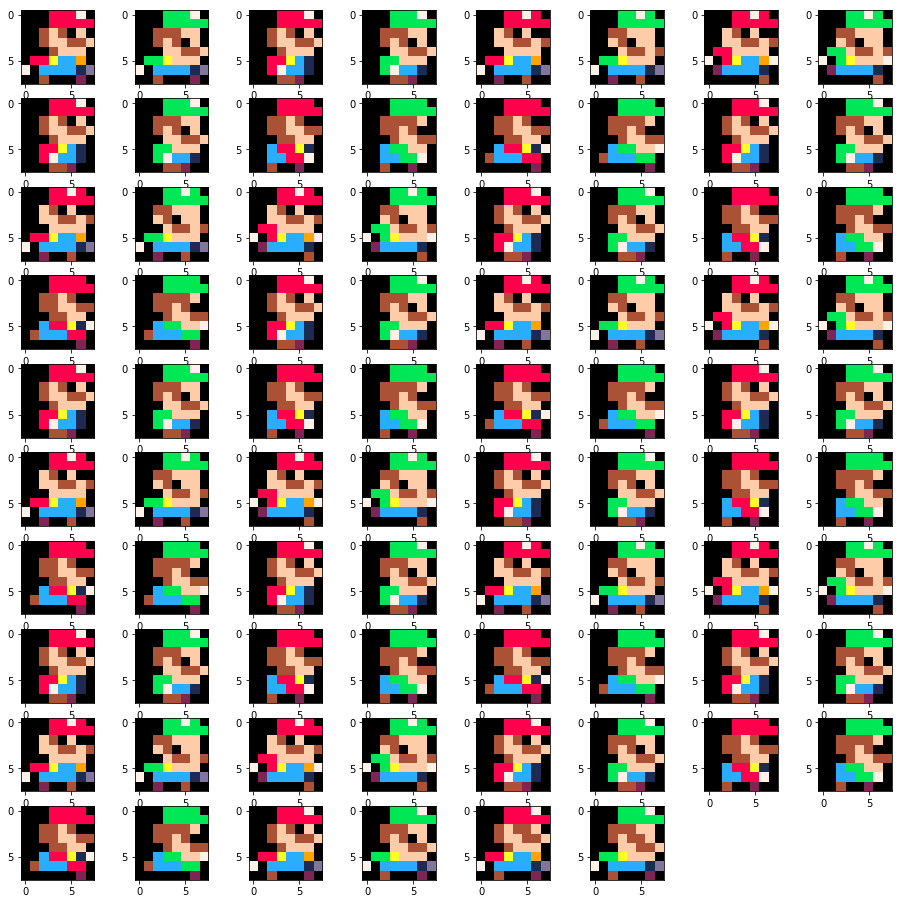

In [14]:
plt.figure(figsize=(16, 16))

marios = np.empty((n_frames, 8, 8, 3), dtype=np.uint8)
luigis = np.empty((n_frames, 8, 8, 3), dtype=np.uint8)

for i, img in enumerate(imgs):
    mario = img[4:12, 18:26]
    luigi = img[4:12, 30:38]
    
    marios[i] = mario
    luigis[i] = luigi
    
    plt.subplot(n_frames // 4 + 1, 8, 2*i+1)
    plt.imshow(mario)
    plt.subplot(n_frames // 4 + 1, 8, 2*i+2)
    plt.imshow(luigi)

In [17]:
lp.Reset()

for img in marios:
    img_colorcodes = rgb_to_colorcode(img)

    for y in range(0, 8):
        for x in range(0, 8):
            code =img_colorcodes[y, x]

            lp.LedCtrlXYByCode(x, y+1, code)

            time.sleep(0.001)
            
    time.sleep(0.01)

lp.Reset()

In [18]:
lp.Close()